In [1]:
## imports

## DS & visuals
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Accessibility
sns.set_palette("pastel")
sns.set_theme(style="whitegrid")

## dattes and house functions
import eda_functions as eda

## Stats 
import scipy
from scipy import stats
## For encoding
#from sklearn.preprocessing import LabelEncoder

## Linear Regression, formula style, easy access.
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

## scikitlearn splir data
from sklearn.model_selection import train_test_split

## 
import warnings
warnings.filterwarnings("ignore")

## Datasets
from sklearn.datasets import fetch_california_housing

In [2]:
X, y = fetch_california_housing(return_X_y=True)
columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
dfx = pd.DataFrame(X, columns=columns)
dfx.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
target = pd.DataFrame(y, columns=['target'])

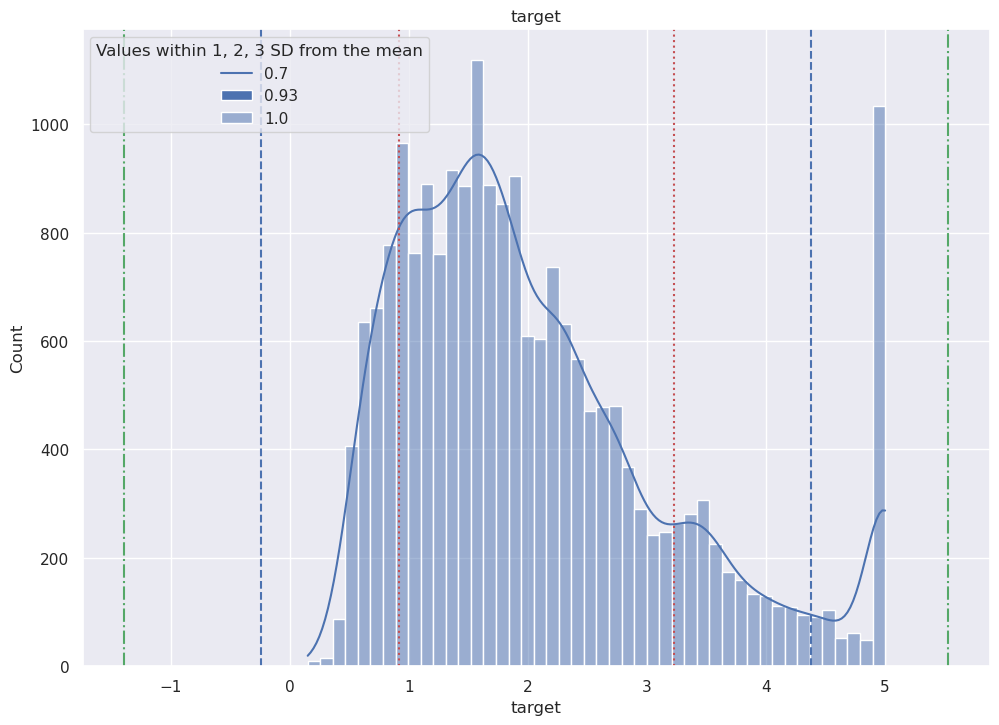

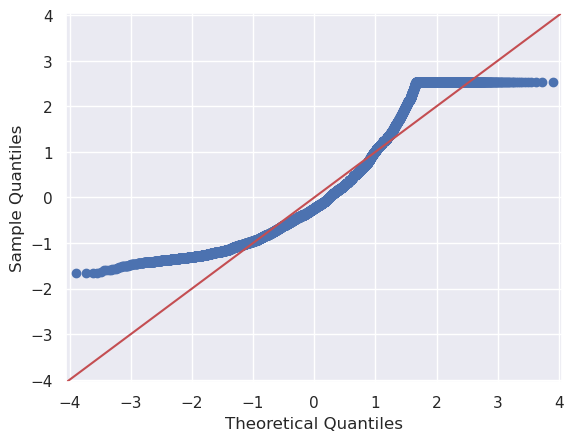

                    target
observations  20640.000000
minimun           0.149990
maximun           5.000010
mean              2.068558
variance          1.331615
skewness          0.977692
kurtosis          0.327500


,target,empirical_rule_suggest,difference
Frac of the values within +/- 1 SD from the mean,0.70,0.680,0.020
Frac of the values within +/- 2 SD from the mean,0.93,0.950,0.020
Frac of the values within +/- 3 SD from the mean,1.00,0.997,0.003


In [4]:
eda.distribution(target, 'target')
print(eda.estadisticas(target, 'target'))
eda.empirical(target, 'target')

In [5]:
dfx.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [6]:
dfx.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [7]:
## to be able to use the formula style OLS is like this also
## this way is very easy to deal with categorical data.
X = dfx
y = target
formula = "target ~ MedInc + HouseAge + AveRooms + AveBedrms + Population + AveOccup + Latitude + Longitude"
data = pd.concat([X, y], axis=1)

## model
modelMR1Object   = ols(formula=formula, data=data)
modelMR1   = modelMR1Object.fit()
MR1Results = modelMR1.summary()

In [8]:
## Multiple Regression numero uno
MR1Results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Sun, 11 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:23:41   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.9419      0.659    -56.067      0.000     -38.233     -35.650
MedInc         0.4367      0.004    104.054      0.000       0.428       0.445
HouseAge       0.0094      0.000     21.143      0.000       0.009       0.010
AveRooms      -0.1073      0.006    -18.235      0.000      -0.119      -0.096
AveBedrms      0.6451      0.028     22.928      0.000       0.590       0.700
Population -3.976e-06   4.75e-06     -0.837      0.402   -1.33e-05    5.33e-06
AveOccup      -0.0038      0.000     -7.769      0.000      -0.005      -0.003
Latitude      -0.4213      0.007    -58.541      0.000      -0.435      -0.407
Longitude     -0.4345      0.008    -57.682      0.000      -0.449      -0.420
==============================================================================
Omnibus:                     4393.650   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14087.596
Skew:                           1.082   Prob(JB):                         0.00
Kurtosis:                       6.420   Cond. No.                     2.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
## LASSO and ridge regularization are just special cases of elastic net regularization
## L1_wt=0 for ridge regression
##
modelMR1Object   = ols(formula=formula, data=data)
modelMRElastic   = modelMR1Object.fit_regularized(method='elastic_net', alpha=0.0, L1_wt=0, start_params=None, profile_scale=False, refit=False)
modelMRElastic.__dir__()
r = modelMRElastic.summary()

NotImplementedError: 

In [34]:
print(r)

<bound method Results.summary of <statsmodels.base.elastic_net.RegularizedResults object at 0x7faa6ecb3af0>>

In [28]:
f_stats, p_value = sm.stats.linear_rainbow(modelMRElastic)
print(f'f-statistic: {f_stats:.5f}, p-value: {p_value:.5f}')

TypeError: res must be a results instance from a linear model.

In [23]:
modelMRElastic.params

array([-3.69419202e+01,  4.36693293e-01,  9.43577803e-03, -1.07322041e-01,
        6.45065694e-01, -3.97638942e-06, -3.78654265e-03, -4.21314378e-01,
       -4.34513755e-01])